# **mount drive**

In [2]:
# prompt: mount drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **load a csv dataset**

In [3]:
# Load a csv dataset
file_path = '/content/drive/MyDrive/titanic-dataset/Titanic-Dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("csv file loaded ")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

csv file loaded 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

# **explore the dataset features , and check types ,summary statistics , missing values and unique counts**

In [4]:
# Explore the dataset
print("Display data type of each column")
print(df.dtypes)

print("generate summary statistics")
print(df.describe(include='all'))

print("check for missing values in each column")
print(df.isnull().sum())

print("display unique counts for each column")
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")

Display data type of each column
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
generate summary statistics
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.

# **fill missing values(e.g., median for age , mode for categorical features )**

In [5]:
# Fill missing values
df = pd.read_csv('/content/drive/MyDrive/titanic-dataset/Titanic-Dataset.csv')

print("check for missing values in each column")
print(df.isnull().sum())

# Fill missing 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing categorical columns with the mode
for col in ['Embarked', 'Cabin']:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())
print(df.head())

check for missing values in each column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  

# **encode categorical variable using one-hot encode and label encoding**

In [6]:
# prompt: encode categorical variable using one-hot encode and label encoding
# Assuming 'df' is your DataFrame and has been loaded and preprocessed as in the previous code

# Select categorical columns to encode (excluding 'Name' and 'Ticket' as they have too many unique values)
categorical_cols = ['Sex', 'Embarked', 'Cabin']

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col + '_label'] = label_encoder.fit_transform(df[col])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for direct array output
encoded_features = onehot_encoder.fit_transform(df[categorical_cols])

# Create new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Print some info or display the head of the modified dataframe to verify encoding.
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Cabin_E8 Cabin_F E69  Cabin_F G63  \
0      0         A/5 21171   7.2500  ...      0.0         0.0          0.0   
1      0          PC 17599  71.2833  ...      0.0         0.0          0.0   
2      0  STON/O2. 3101282   7.9250  ...      0.0         0.0          0.0   
3      0

# **normalize numarical features using minmaxscaler or standardscaler**

In [7]:
# prompt: normalize numarical features using minmaxscaler or standardscaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features to normalize
numerical_cols = ['Age', 'Fare']ws

# MinMaxScaler
minmax_scaler = MinMaxScaler()
# Create new columns for minmax scaled features individually
for col in numerical_cols:
    df[col + '_minmax'] = minmax_scaler.fit_transform(df[[col]])  # Note: Double brackets around col for DataFrame selection

# StandardScaler
standard_scaler = StandardScaler()
# Create new columns for standard scaled features individually
for col in numerical_cols:
    df[col + '_standard'] = standard_scaler.fit_transform(df[[col]]) # Note: Double brackets around col for DataFrame selection

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Cabin_F2 Cabin_F33  Cabin_F38  \
0      0         A/5 21171   7.2500  ...      0.0       0.0        0.0   
1      0          PC 17599  71.2833  ...      0.0       0.0        0.0   
2      0  STON/O2. 3101282   7.9250  ...      0.0       0.0        0.0   
3      0            1138

# **create new features and extract title from the passenger name (e.g., Mr., Mrs.,)**

In [8]:
# prompt: create new features and extract title from the passenger name (e.g., Mr., Mrs.,)

# Extract title from passenger name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with more common ones
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Now you have a new 'Title' feature in your DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Cabin_F33 Cabin_F38  Cabin_F4  \
0      0         A/5 21171   7.2500  ...       0.0       0.0       0.0   
1      0          PC 17599  71.2833  ...       0.0       0.0       0.0   
2      0  STON/O2. 3101282   7.9250  ...       0.0       0.0       0.0   
3      0            1138

# **create a family size features by combining sibling and parent counts**

In [9]:
# prompt: create a family size features by combining sibling and parent counts

# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Cabin_F38 Cabin_F4  Cabin_G6  \
0      0         A/5 21171   7.2500  ...       0.0      0.0       0.0   
1      0          PC 17599  71.2833  ...       0.0      0.0       0.0   
2      0  STON/O2. 3101282   7.9250  ...       0.0      0.0       0.0   
3      0            113803  

# **calculate performance metrics : accuracy , precision, recall, and f1-score**

In [10]:
# prompt: calculate performance metrics : accuracy , precision, recall, and f1-score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'df' is your DataFrame and has been loaded and preprocessed as in the
# previous code

# Define features (X) and target variable (y)
X = df[['Pclass', 'Age_minmax', 'Fare_minmax','Sex_label','Embarked_label','FamilySize']]  # Example features, modify as needed
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model (you can choose a different model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888


# **plot a confusion matrix and a ROC curve**

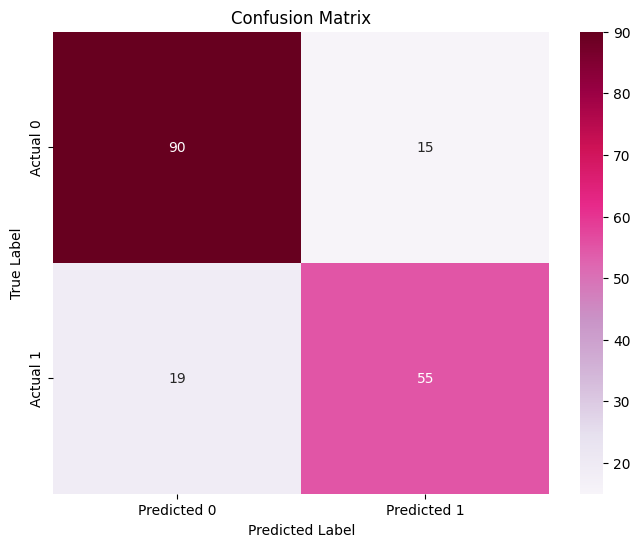

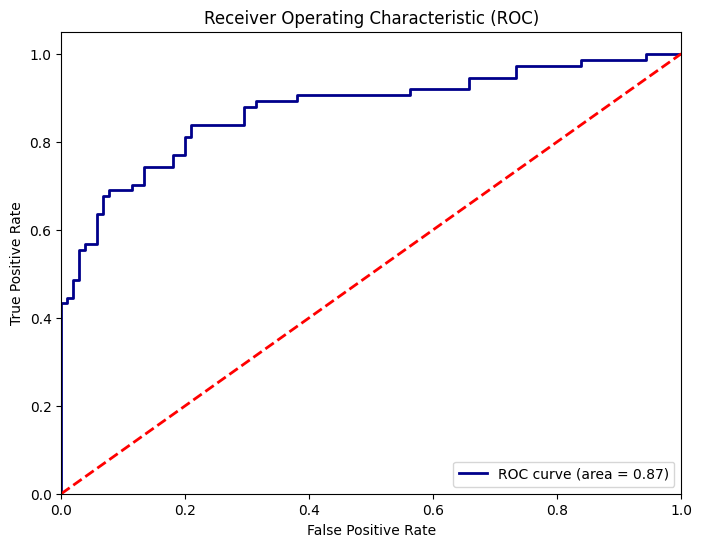

In [11]:
# prompt: plot a confusion matrix and a ROC curve

from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined from your previous code

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **decision trees**

In [12]:
# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=5000) # Increased max_iter
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [13]:
# Assuming 'df', 'X_train', 'X_test', 'y_train', 'y_test' are defined from the previous code

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # 'liblinear' supports both l1 and l2 penalties
}


# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=5000)  # increased max iterations


# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)


# Predict using the best model from GridSearchCV
y_pred_grid = grid_search.predict(X_test)

# Calculate accuracy for GridSearchCV
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy (GridSearchCV): {accuracy_grid}")


# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best score (RandomizedSearchCV):", random_search.best_score_)


# Predict using the best model from RandomizedSearchCV
y_pred_random = random_search.predict(X_test)

# Calculate accuracy for RandomizedSearchCV
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy (RandomizedSearchCV): {accuracy_random}")

Best parameters (GridSearchCV): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score (GridSearchCV): 0.801920614596671
Accuracy (GridSearchCV): 0.7932960893854749
Best parameters (RandomizedSearchCV): {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
Best score (RandomizedSearchCV): 0.7990938638825963
Accuracy (RandomizedSearchCV): 0.7821229050279329


# **grid search and randomized search decision trees**

In [14]:
# prompt: use grid search and randomized search decision trees

from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# Perform GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Print best parameters and best score for Decision Tree (GridSearchCV)
print("\nDecision Tree - Best parameters (GridSearchCV):", grid_search_dt.best_params_)
print("Decision Tree - Best score (GridSearchCV):", grid_search_dt.best_score_)

# Predict using the best Decision Tree model from GridSearchCV
y_pred_grid_dt = grid_search_dt.predict(X_test)

# Calculate accuracy for Decision Tree (GridSearchCV)
accuracy_grid_dt = accuracy_score(y_test, y_pred_grid_dt)
print(f"Decision Tree - Accuracy (GridSearchCV): {accuracy_grid_dt}")


# Define the parameter distribution for RandomizedSearchCV for Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Perform RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train)

# Print best parameters and best score for Decision Tree (RandomizedSearchCV)
print("\nDecision Tree - Best parameters (RandomizedSearchCV):", random_search_dt.best_params_)
print("Decision Tree - Best score (RandomizedSearchCV):", random_search_dt.best_score_)

# Predict using the best Decision Tree model from RandomizedSearchCV
y_pred_random_dt = random_search_dt.predict(X_test)

# Calculate accuracy for Decision Tree (RandomizedSearchCV)
accuracy_random_dt = accuracy_score(y_test, y_pred_random_dt)
print(f"Decision Tree - Accuracy (RandomizedSearchCV): {accuracy_random_dt}")


Decision Tree - Best parameters (GridSearchCV): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree - Best score (GridSearchCV): 0.8174037230375258
Decision Tree - Accuracy (GridSearchCV): 0.8268156424581006

Decision Tree - Best parameters (RandomizedSearchCV): {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Decision Tree - Best score (RandomizedSearchCV): 0.8174037230375258
Decision Tree - Accuracy (RandomizedSearchCV): 0.8324022346368715


# **plot a confusion matrix and a ROC curve decision tree**

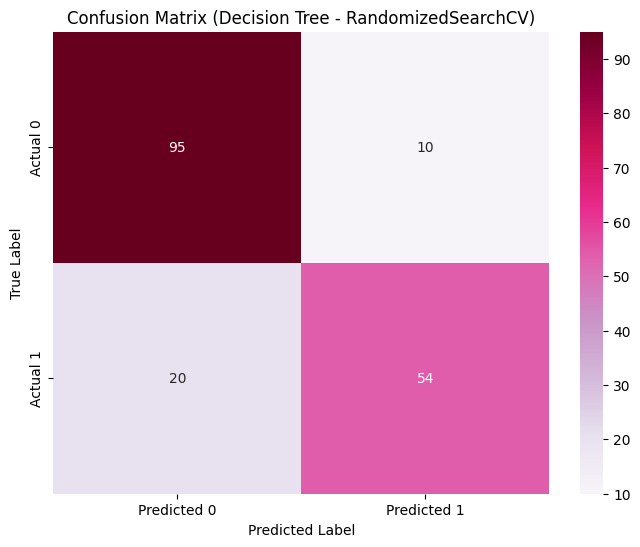

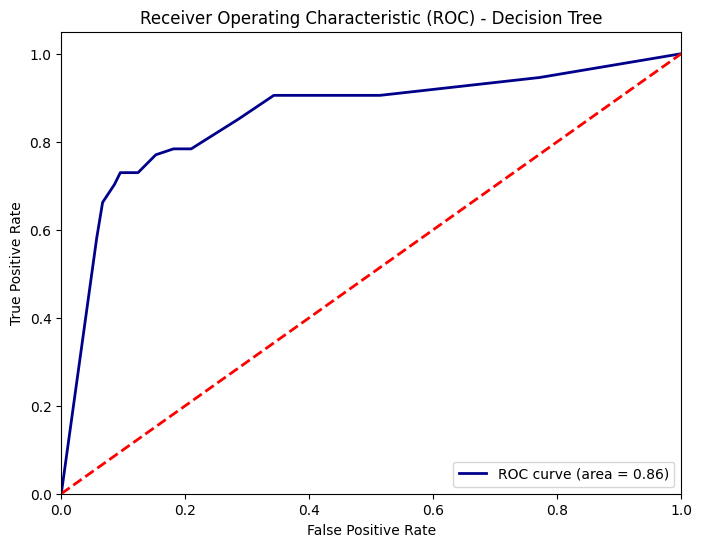

In [15]:
# prompt: plot a confusion matrix and a ROC curve decision tree

# Assuming y_test and y_pred_random_dt are defined from the previous code (RandomizedSearchCV for Decision Tree)

from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_random_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Decision Tree - RandomizedSearchCV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_prob = random_search_dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# **Random Forest Model**

In [17]:
# prompt: random forest model

from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code) ...

# Assuming 'df', 'X_train', 'X_test', 'y_train', 'y_test' are defined from the previous code

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate performance metrics for RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nRandom Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - Recall: {recall_rf}")
print(f"Random Forest - F1-score: {f1_rf}")


Random Forest - Accuracy: 0.8268156424581006
Random Forest - Precision: 0.7945205479452054
Random Forest - Recall: 0.7837837837837838
Random Forest - F1-score: 0.7891156462585034


# **plot a confusion matrix and a ROC curve above code of random forest model**

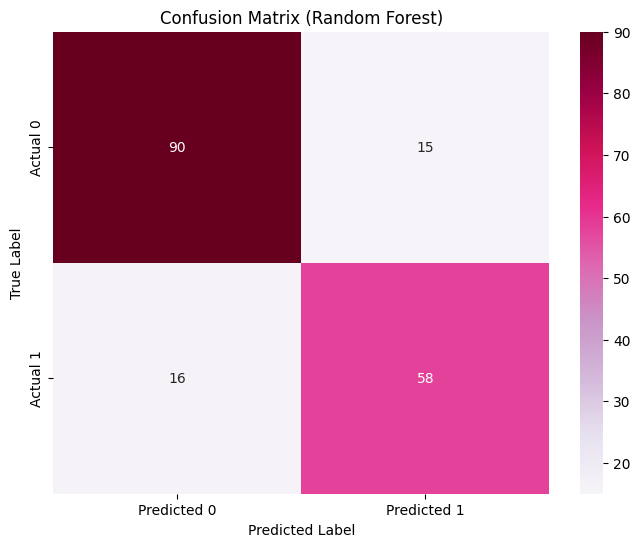

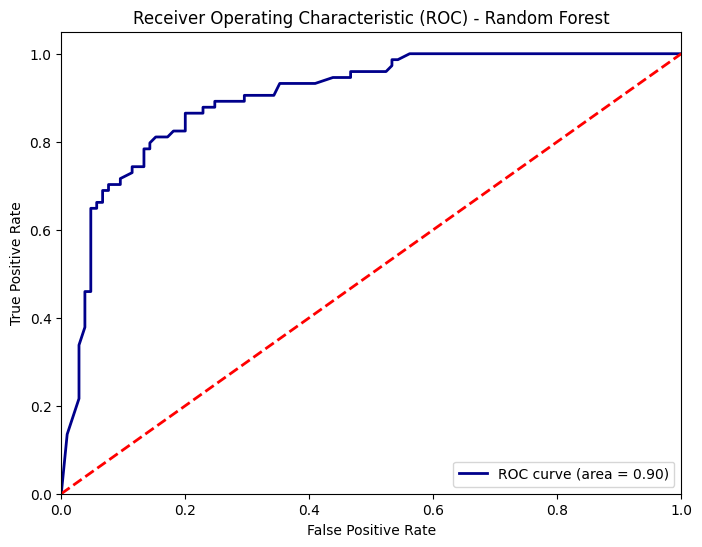

In [18]:
# prompt: plot a confusion matrix and a ROC curve random forest model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ... (Your existing code) ...

# Assuming y_test and y_pred_rf are defined from your Random Forest model

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="PuRd",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve for Random Forest
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# **SVM Model**


SVM - Accuracy: 0.7821229050279329
SVM - Precision: 0.7536231884057971
SVM - Recall: 0.7027027027027027
SVM - F1-score: 0.7272727272727273


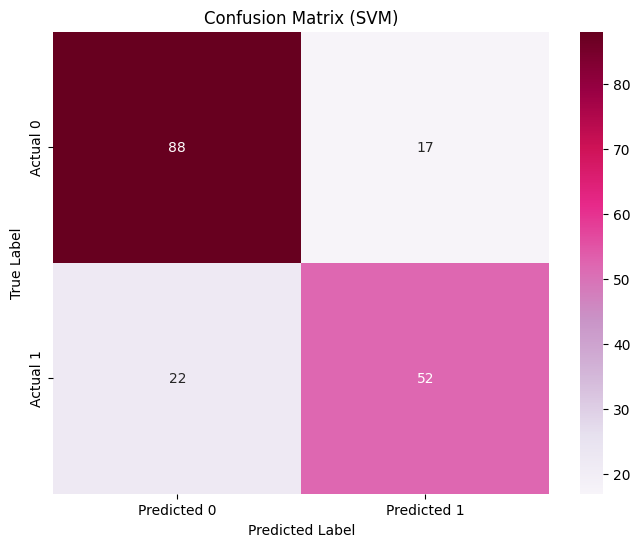

In [19]:
# prompt: train this dataset for svm model

from sklearn.svm import SVC

# ... (Your existing code) ...

# Assuming 'df', 'X_train', 'X_test', 'y_train', 'y_test' are defined from the previous code

# Initialize and train an SVM model
svm_classifier = SVC(kernel='linear', random_state=42) # You can change the kernel (e.g., 'rbf', 'poly')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"\nSVM - Accuracy: {accuracy_svm}")
print(f"SVM - Precision: {precision_svm}")
print(f"SVM - Recall: {recall_svm}")
print(f"SVM - F1-score: {f1_svm}")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="PuRd",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **train a K-Nearest Neighbors (KNN) Classifier**


KNN - Accuracy: 0.8268156424581006
KNN - Precision: 0.8412698412698413
KNN - Recall: 0.7162162162162162
KNN - F1-score: 0.7737226277372263


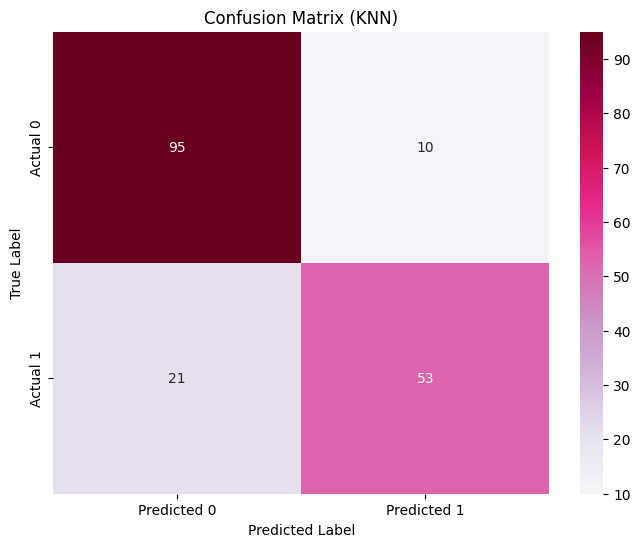

In [20]:
# Assuming 'df', 'X_train', 'X_test', 'y_train', 'y_test' are defined from the previous code

# Initialize and train a K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate performance metrics for KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"\nKNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1-score: {f1_knn}")

# Confusion Matrix for KNN
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="PuRd",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **train a K-Nearest Neighbors (KNN) Classifier**


KNN - Accuracy: 0.8268156424581006
KNN - Precision: 0.8412698412698413
KNN - Recall: 0.7162162162162162
KNN - F1-score: 0.7737226277372263


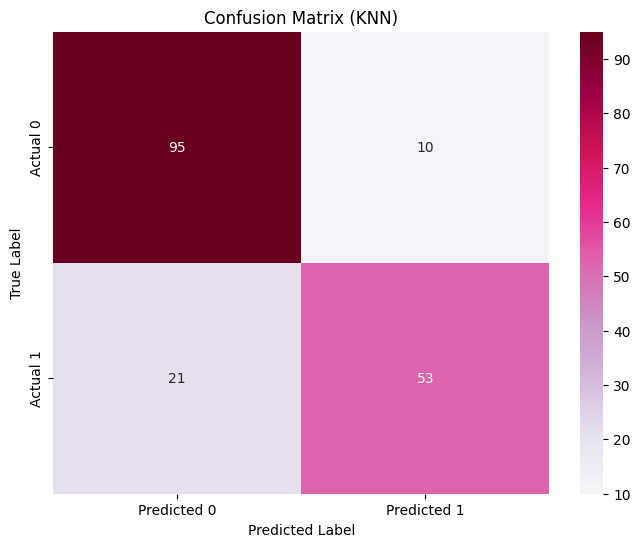

In [21]:
# Assuming 'df', 'X_train', 'X_test', 'y_train', 'y_test' are defined from the previous code

# Initialize and train a K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate performance metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"\nKNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1-score: {f1_knn}")

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="PuRd",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **compare default parameters with the tuned models performance**

In [26]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression (Default)', 'Logistic Regression (GridSearchCV)', 'Logistic Regression (RandomizedSearchCV)',
              'Decision Tree (GridSearchCV)', 'Decision Tree (RandomizedSearchCV)',
              'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [accuracy, accuracy_grid, accuracy_random, accuracy_grid_dt, accuracy_random_dt, accuracy_rf, accuracy_svm, accuracy_knn]
    # Add other metrics (precision, recall, F1-score) here if you want to compare them
})

# Print the results
results

,Model,Accuracy
0,Logistic Regression (Default),0.810056
1,Logistic Regression (GridSearchCV),0.793296
2,Logistic Regression (RandomizedSearchCV),0.782123
3,Decision Tree (GridSearchCV),0.826816
4,Decision Tree (RandomizedSearchCV),0.832402
5,Random Forest,0.826816
6,SVM,0.782123
7,KNN,0.826816


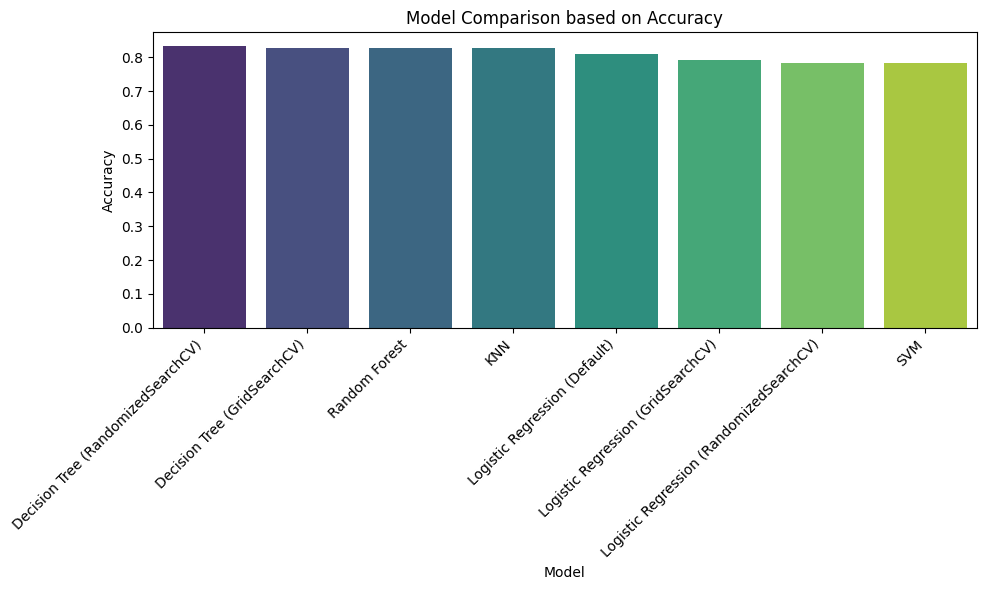

In [30]:
#Further analysis and visualization to compare default and tuned model performances

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_sorted, hue='Model', legend=False, palette='viridis') # Assign 'x' to 'hue', set legend=False
plt.title('Model Comparison based on Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
